In [59]:

# In many practical Data Science activities, the data set will contain categorical variables. These variables are 
# typically stored as text values which represent various traits. Some examples include color (“Red”, “Yellow”, “Blue”), 
# size (“Small”, “Medium”, “Large”) or geographic designations (State or Country). Regardless of what the value is 
# used for, the challenge is determining how to use this data in the analysis. Many machine learning algorithms can 
# support categorical values without further manipulation but there are many more algorithms that do not. Therefore, 
# the analyst is faced with the challenge of figuring out how to turn these text attributes into numerical values for further processing.

# For instance, let's get categorycodes for a feature in a dataframe
# import label encoder
from sklearn import preprocessing
# label_encoder object knows how to understand word labels. 
label_encoder = preprocessing.LabelEncoder()
# Encode labels in column 'Country'. 
data['Country']= label_encoder.fit_transform(data[‘Country']) 
print(data.head())
                                                  

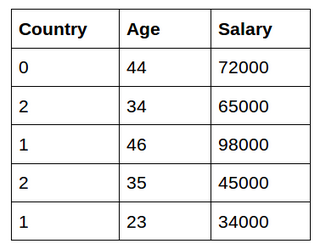

In [9]:

from IPython.display import Image
Image(filename='C:\\Users\\ryans\\OneDrive\\Desktop\\Briefcase\\PDFs\\1-ALL PYTHON & R CODE SAMPLES\\A - GITHUB\\Convert All Labels in Dataframe Into Numerics\\label_encoder.jpg', width=250)


In [ ]:
                                          
# In the above scenario, the Country names do not have an order or rank. But, when label encoding is performed, 
# the country names are ranked based on the alphabets. Due to this, there is a very high probability that the model 
# captures the relationship between countries such as India < Japan < the US.


In [ ]:

# importing one hot encoder 
from sklearn from sklearn.preprocessing import OneHotEncoder
# creating one hot encoder object 
onehotencoder = OneHotEncoder()
#reshape the 1-D country array to 2-D as fit_transform expects 2-D and finally fit the object 
X = onehotencoder.fit_transform(data.Country.values.reshape(-1,1)).toarray()
#To add this back into the original dataframe 
dfOneHot = pd.DataFrame(X, columns = ["Country_"+str(int(i)) for i in range(data.shape[1])]) 
df = pd.concat([data, dfOneHot], axis=1)
#droping the country column 
df= df.drop(['Country'], axis=1) 
#printing to verify 
print(df.head())


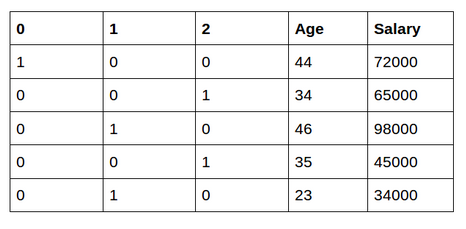

In [7]:

Image(filename='C:\\Users\\ryans\\OneDrive\\Desktop\\Briefcase\\PDFs\\1-ALL PYTHON & R CODE SAMPLES\\A - GITHUB\\Convert All Labels in Dataframe Into Numerics\\one_hot_encoder.jpg', width=400)


In [ ]:

# Here, 3 new features are added as the country contains 3 unique values – India, Japan, and the US. Using this 
# technique, we solved the problem of ranking as each category is represented by a binary vector.


In [10]:

# Based on the solutions above, we can convert one field at a time, from categorical data to numerical data.
# However, this is a very tedious process if we need to convert LOTS of fields from categorical to numerical!
# Below, we see a solution, where we can easily convert all labeled data, in a dataframe, into numeric data, in one go!!!

import pandas as pd
 
# Intitialise data of lists
data = [{'Year': 2020, 'Airport':2000, 'Casino':5000, 'Stadium':9000, 'Size':'Small'}, 
       {'Year': 2019, 'Airport':3000, 'Casino':4000, 'Stadium':12000, 'Size':'Medium'},
       {'Year': 2018, 'Airport':5000, 'Casino':9000, 'Stadium':10000, 'Size':'Medium'},
       {'Year': 2017, 'Airport':5000, 'Casino':10000, 'Stadium':15000, 'Size':'Large'}]
df = pd.DataFrame(data)


df = df.set_index(['Year'])
df

df_fin = pd.DataFrame({col: df[col].astype('category').cat.codes for col in df}, index=df.index)
df_fin


,Airport,Casino,Stadium,Size
Year,,,,
2020,0,1,0,2
2019,1,0,2,1
2018,2,2,1,1
2017,2,3,3,0


In [12]:

# We apply One-Hot Encoding when:
# 
#     The categorical feature is not ordinal (like the countries above)
#     The number of categorical features is less so one-hot encoding can be effectively applied

# We apply Label Encoding when:
# 
#     The categorical feature is ordinal (like Jr. kg, Sr. kg, Primary school, high school)
#      The number of categories is quite large as one-hot encoding can lead to high memory consumption
